In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
store = pd.read_csv('D:/INFO442/data/preprocessed_store.csv')
train = pd.read_csv('D:/INFO442/data/preprocessed_train.csv', index_col='Date', parse_dates=True)
test = pd.read_csv('D:/INFO442/data/preprocessed_test.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pmdarima


  Using cached pmdarima-2.0.4-cp39-cp39-win_amd64.whl (614 kB)
  Using cached statsmodels-0.14.2-cp39-cp39-win_amd64.whl (9.9 MB)
  Using cached numpy-2.0.1-cp39-cp39-win_amd64.whl (16.6 MB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: urllib3 in c:\programdata\anaconda3\lib\site-packages (from pmdarima) (1.26.7)



ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.20.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
  Using cached packaging-24.1-py3-none-any.whl (53 kB)
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl (11.6 MB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:


**EDA**

some basic eda

In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [34]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_Log
Date,,,,,,,,,
2015-07-31,1,5,0.126664,0.075122,1,1,0,1,526301
2015-07-31,2,5,0.145941,0.084597,1,1,0,1,606401
2015-07-31,3,5,0.200091,0.111126,1,1,0,1,831401
2015-07-31,4,5,0.336815,0.202761,1,1,0,1,1399501
2015-07-31,5,5,0.116050,0.075663,1,1,0,1,482201


In [7]:
y = train['Sales'].resample('M').sum()

correlation

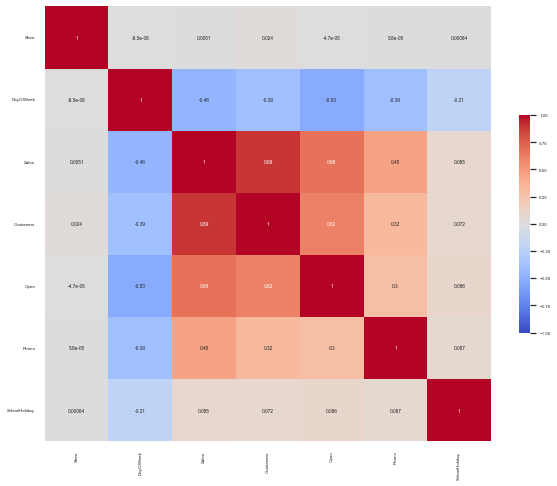

In [8]:
train_corr = train.corr()
# Setting the canvas size and font size
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.4)

# Generate heat maps, adjust label rotation and color scale size
ax = sns.heatmap(
    train_corr,
    annot=True,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    cmap='coolwarm',
    cbar_kws={"shrink": 0.5}
)

# Rotating label
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

Seasonality

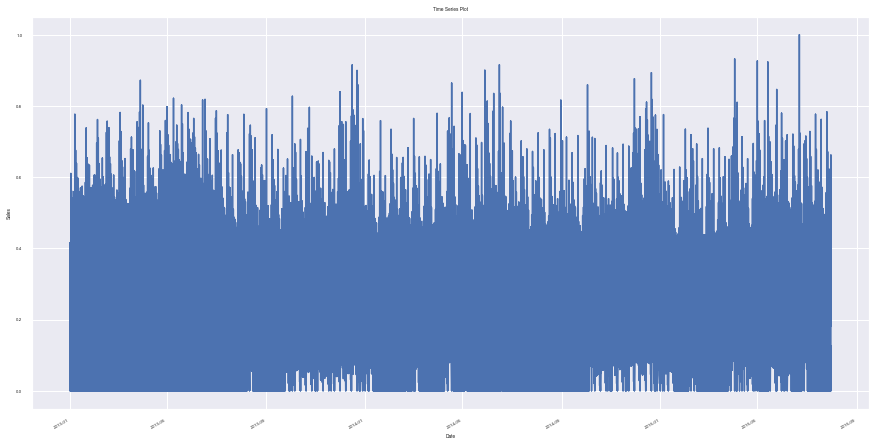

In [26]:
train['Sales'].plot(figsize=(15, 8))
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

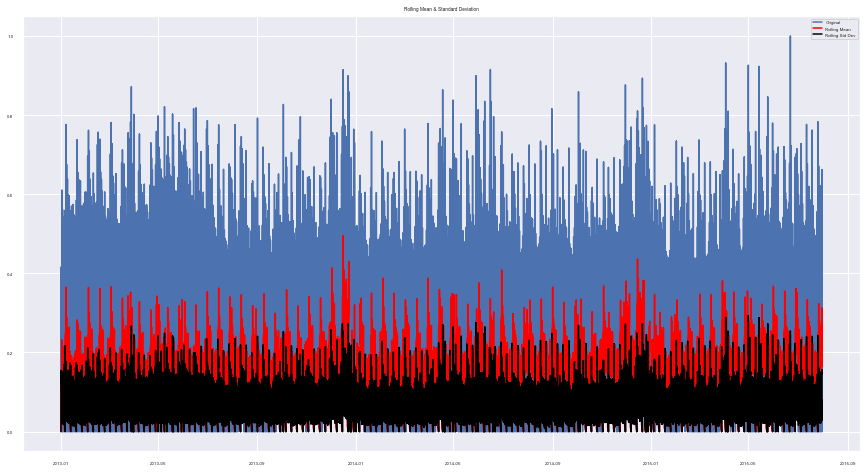

In [29]:
rolling_mean = train['Sales'].rolling(window=12).mean()
rolling_std = train['Sales'].rolling(window=12).std()

plt.figure(figsize=(15, 8))
plt.plot(train['Sales'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series.dropna())  # Drop NaN values if any
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
    if result[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is not stationary")

# Check stationarity of the Sales data
check_stationarity(train['Sales'])


KeyboardInterrupt: 

In [39]:
train

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_Log
Date,,,,,,,,,
2015-07-31,1,5,0.126664,0.075122,1,1,0,1,13.666362
2015-07-31,2,5,0.145941,0.084597,1,1,0,1,15.594113
2015-07-31,3,5,0.200091,0.111126,1,1,0,1,21.009145
2015-07-31,4,5,0.336815,0.202761,1,1,0,1,34.681500
2015-07-31,5,5,0.116050,0.075663,1,1,0,1,12.605016
...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0.000000,0.000000,0,0,a,1,1.000000
2013-01-01,1112,2,0.000000,0.000000,0,0,a,1,1.000000
2013-01-01,1113,2,0.000000,0.000000,0,0,a,1,1.000000


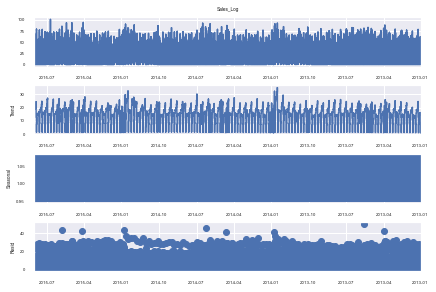

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

train['Sales_Log'] = train['Sales']*100 + 1
result = seasonal_decompose(train['Sales_Log'], model='multiplicative', period=365*2)


result.plot()#trend seasonal residual
plt.show()

**Normalization**

In [11]:
from sklearn.preprocessing import MinMaxScaler


In [12]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

cols_to_normalize = ['Sales', 'Customers']
train[cols_to_normalize] = scaler.fit_transform(train[cols_to_normalize])

print(train[['Sales', 'Customers']].head())


               Sales  Customers
Date                           
2015-07-31  0.126664   0.075122
2015-07-31  0.145941   0.084597
2015-07-31  0.200091   0.111126
2015-07-31  0.336815   0.202761
2015-07-31  0.116050   0.075663


In [13]:
train[cols_to_normalize].describe()

,Sales,Customers
count,1.017209e+06,1.017209e+06
mean,1.389574e-01,8.569923e-02
std,9.265544e-02,6.286028e-02
min,0.000000e+00,0.000000e+00
25%,8.969700e-02,5.481862e-02
50%,1.382398e-01,8.243097e-02
75%,1.890689e-01,1.132918e-01
max,1.000000e+00,1.000000e+00


**modeling**

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [24]:
sarima_model = SARIMAX(train['Sales'])
sarima_result = sarima_model.fit()

print(sarima_result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:              1017209
Model:               SARIMAX(1, 0, 0)   Log Likelihood             1083036.258
Date:                Fri, 09 Aug 2024   AIC                       -2166068.516
Time:                        02:43:58   BIC                       -2166044.851
Sample:                             0   HQIC                      -2166062.008
                            - 1017209                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8663      0.000   2470.527      0.000       0.866       0.867
sigma2         0.0070   5.13e-06   1356.503      0.000       0.007       0.007
Ljung-Box (L1) (Q):              217611.75   Jarque-